In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline

In [3]:
df = pd.read_csv("dataset_heart.csv")
df.head(10)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [54]:
# Checking the shape of the data
df.shape

(270, 14)

In [50]:
# Checking total size of the dataset
df.size

3780

In [51]:
# Checking the information and datatype of the variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [46]:
# It seems the datatype are correct and no null values present
df.isnull().any().sum()

0

#### As per data information the dependent variable to be predicted is heart disease column. Absence of heart disease is represented by 1 and the presence is represented by 2


#### EDA descriptive statistics

In [4]:
df.loc[:,df.columns!='heart disease'].describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [76]:
# Checking duplicate values

df.duplicated().sum()

0

In [ ]:
# Plotting boxplot of the data

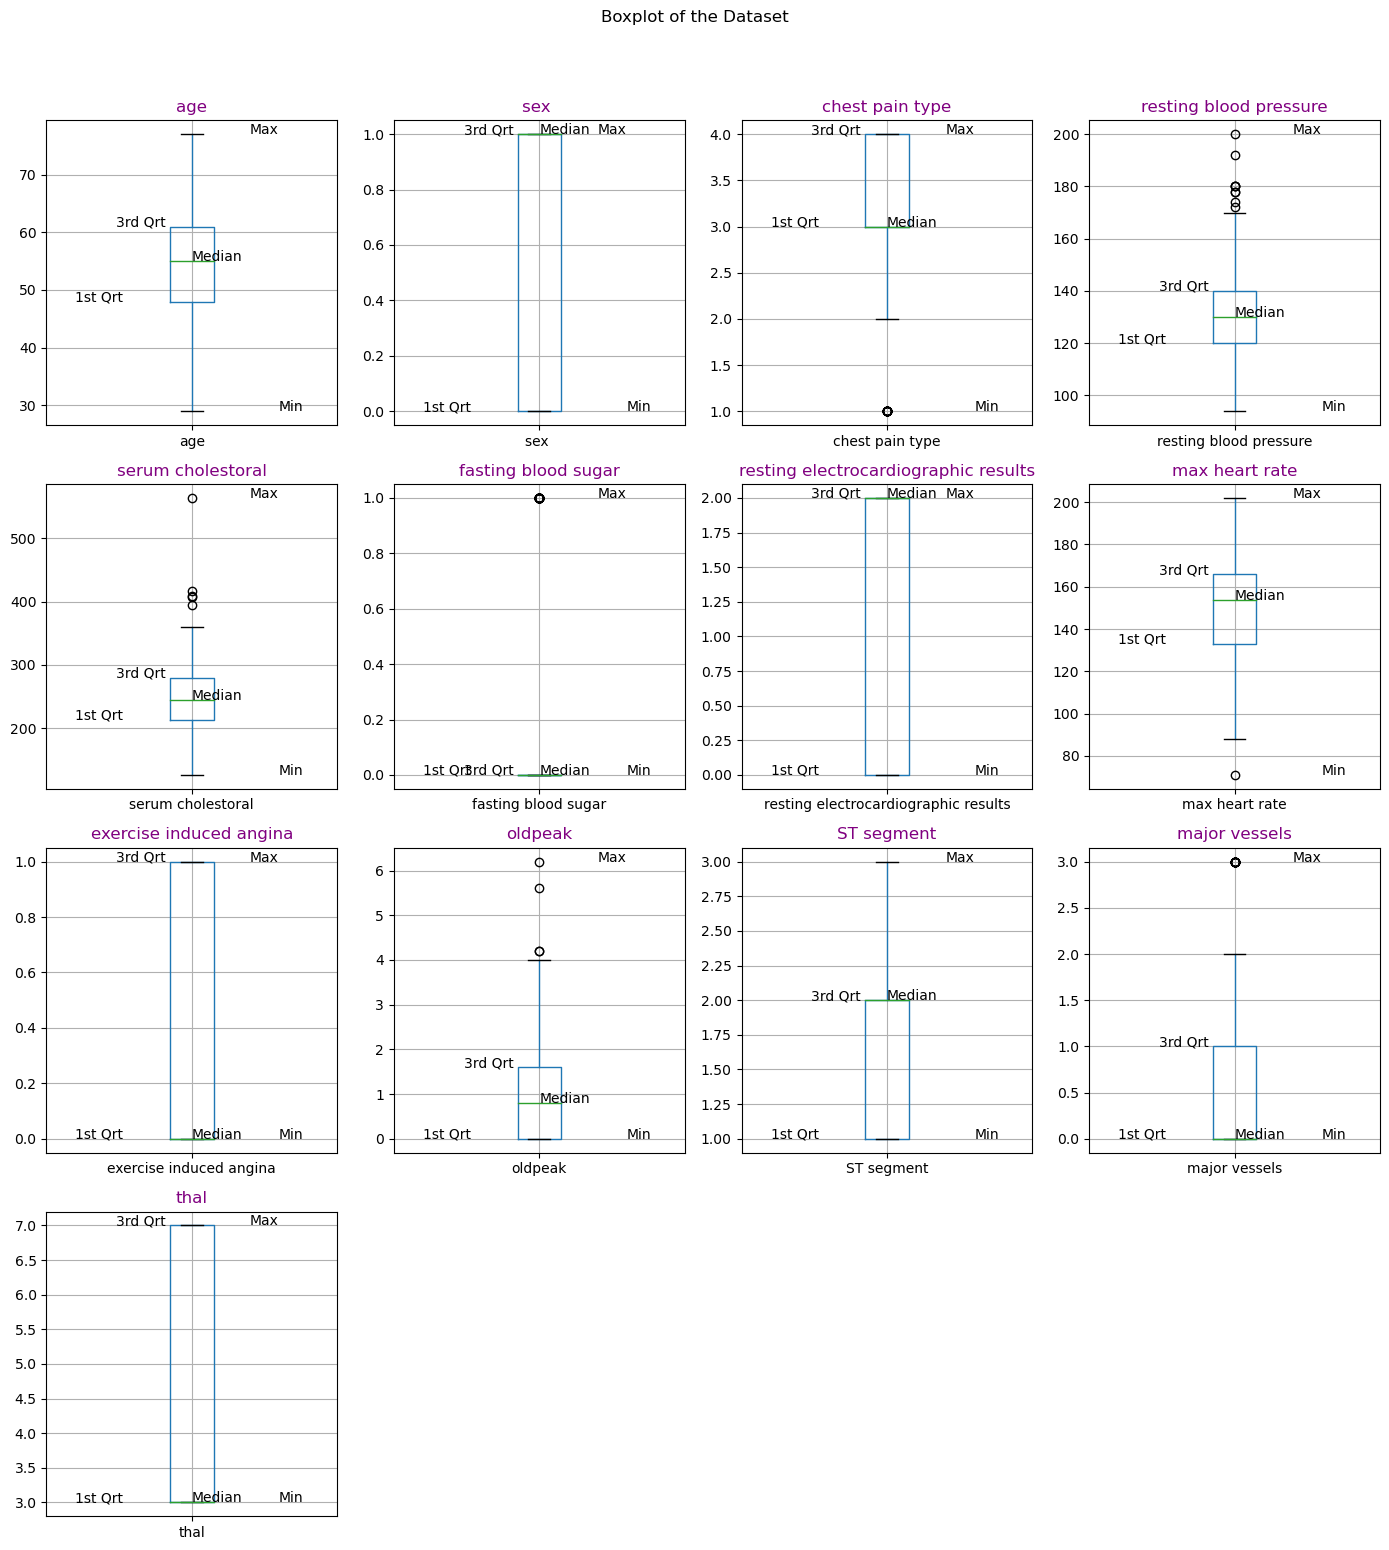

In [5]:
fig=plt.figure(figsize=(14,15))
fig.suptitle('Boxplot of the Dataset', y=1.03)
for i in range(0,df.loc[:,df.columns!='heart disease'].shape[1]):
    ax=fig.add_subplot(4,4,i+1)
    df.boxplot(column=df.columns[i],return_type='axes',figsize=(8,8))
    plt.text(x=0.74, y=df[df.columns[i]].quantile(q=0.75), s="3rd Qrt")
    plt.text(x=1.0, y=df[df.columns[i]].median(), s="Median")
    plt.text(x=0.6, y=df[df.columns[i]].quantile(q=0.25), s="1st Qrt")
    plt.text(x=1.3, y=df[df.columns[i]].min(), s="Min")
    plt.text(x=1.2, y=df[df.columns[i]].max(), s="Max")
    ax.set_title(df.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

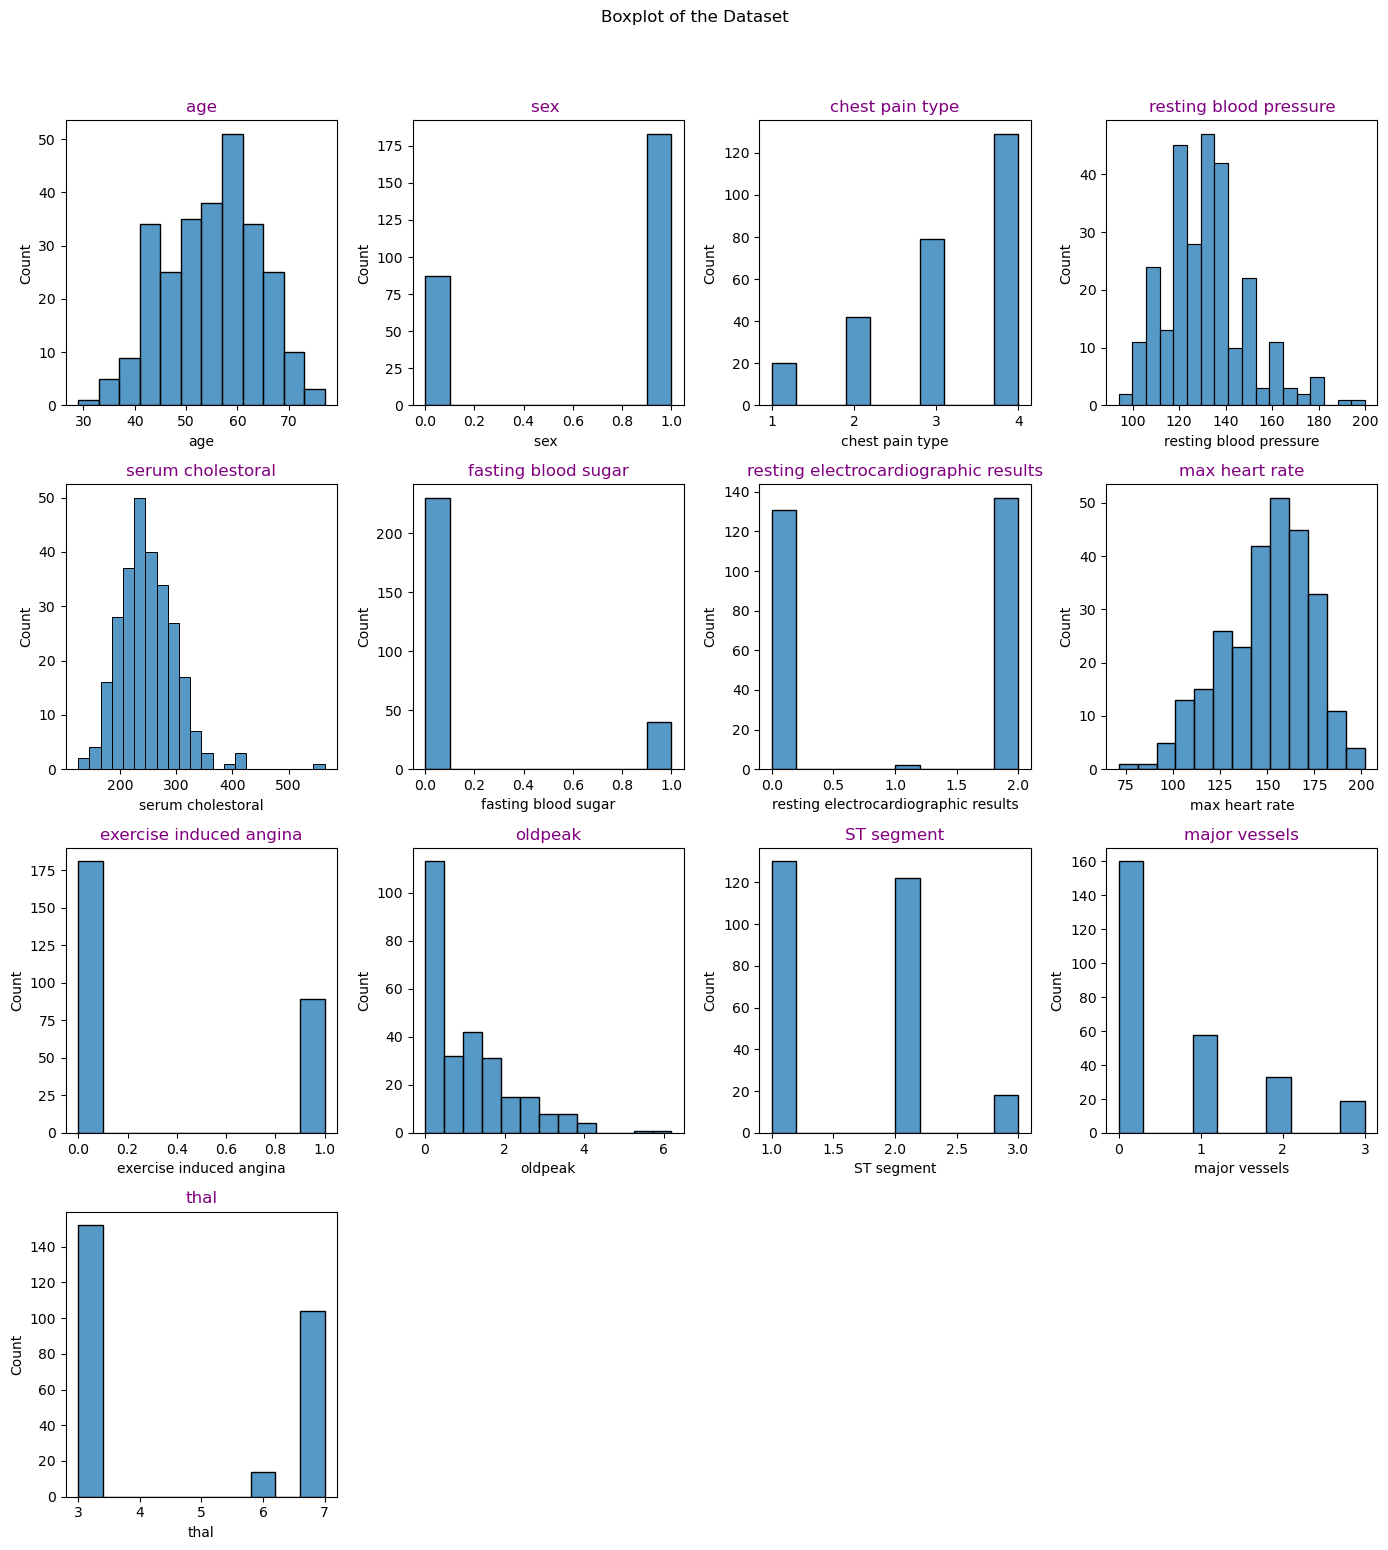

In [6]:
#plotting histogram
fig=plt.figure(figsize=(14,15))
fig.suptitle('Boxplot of the Dataset', y=1.03)
for i in range(0,df.loc[:,df.columns!='heart disease'].shape[1]):
    ax=fig.add_subplot(4,4,i+1)
    sns.histplot(df[df.columns[i]])
    ax.set_title(df.columns[i], color='purple')
    
plt.tight_layout()
plt.show()


#### Bivariate analysis, target Variable versus the indpendent variables with object datatype


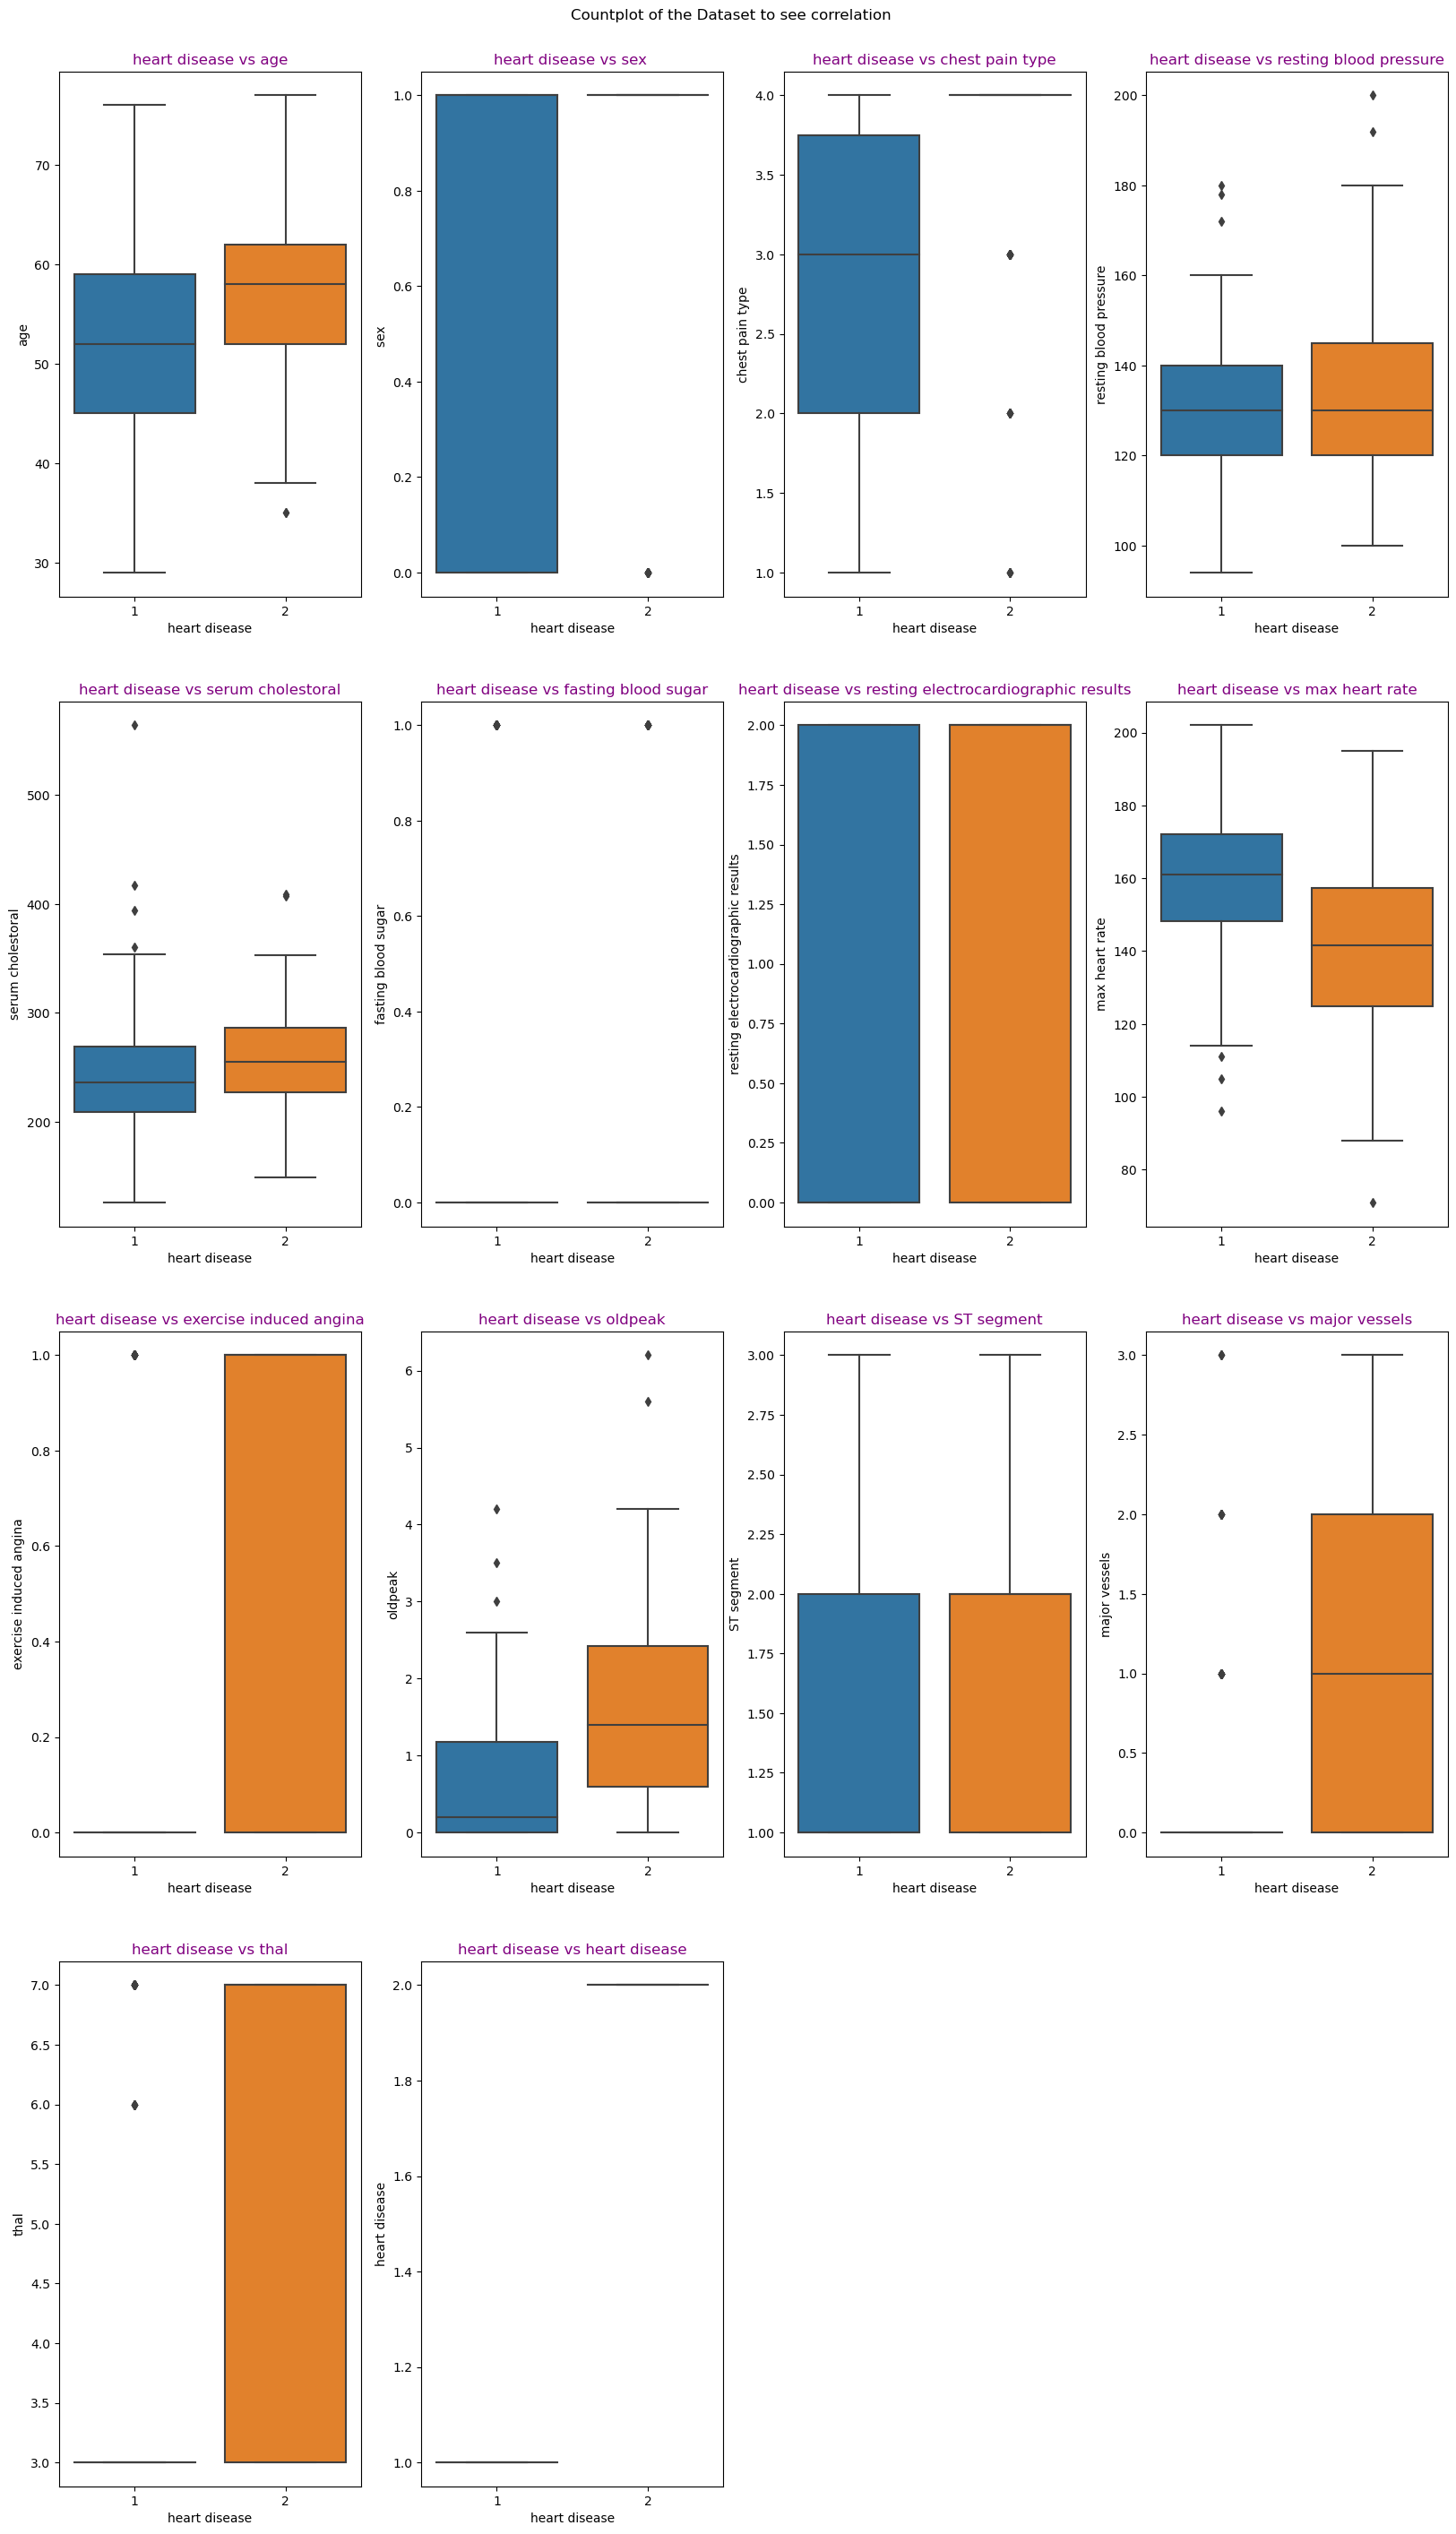

In [25]:
fig=plt.figure(figsize=(20,35))
fig.suptitle('Countplot of the Dataset to see correlation', y=0.9)
for i in range(0,df.shape[1]):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(x=df['heart disease'], y=df[df.columns[i]])
    ax.set_title('heart disease vs {}'.format(df.columns[i]), color='purple')
    

plt.show()

#### Multivariate analysis

C:\Users\GPBNV\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


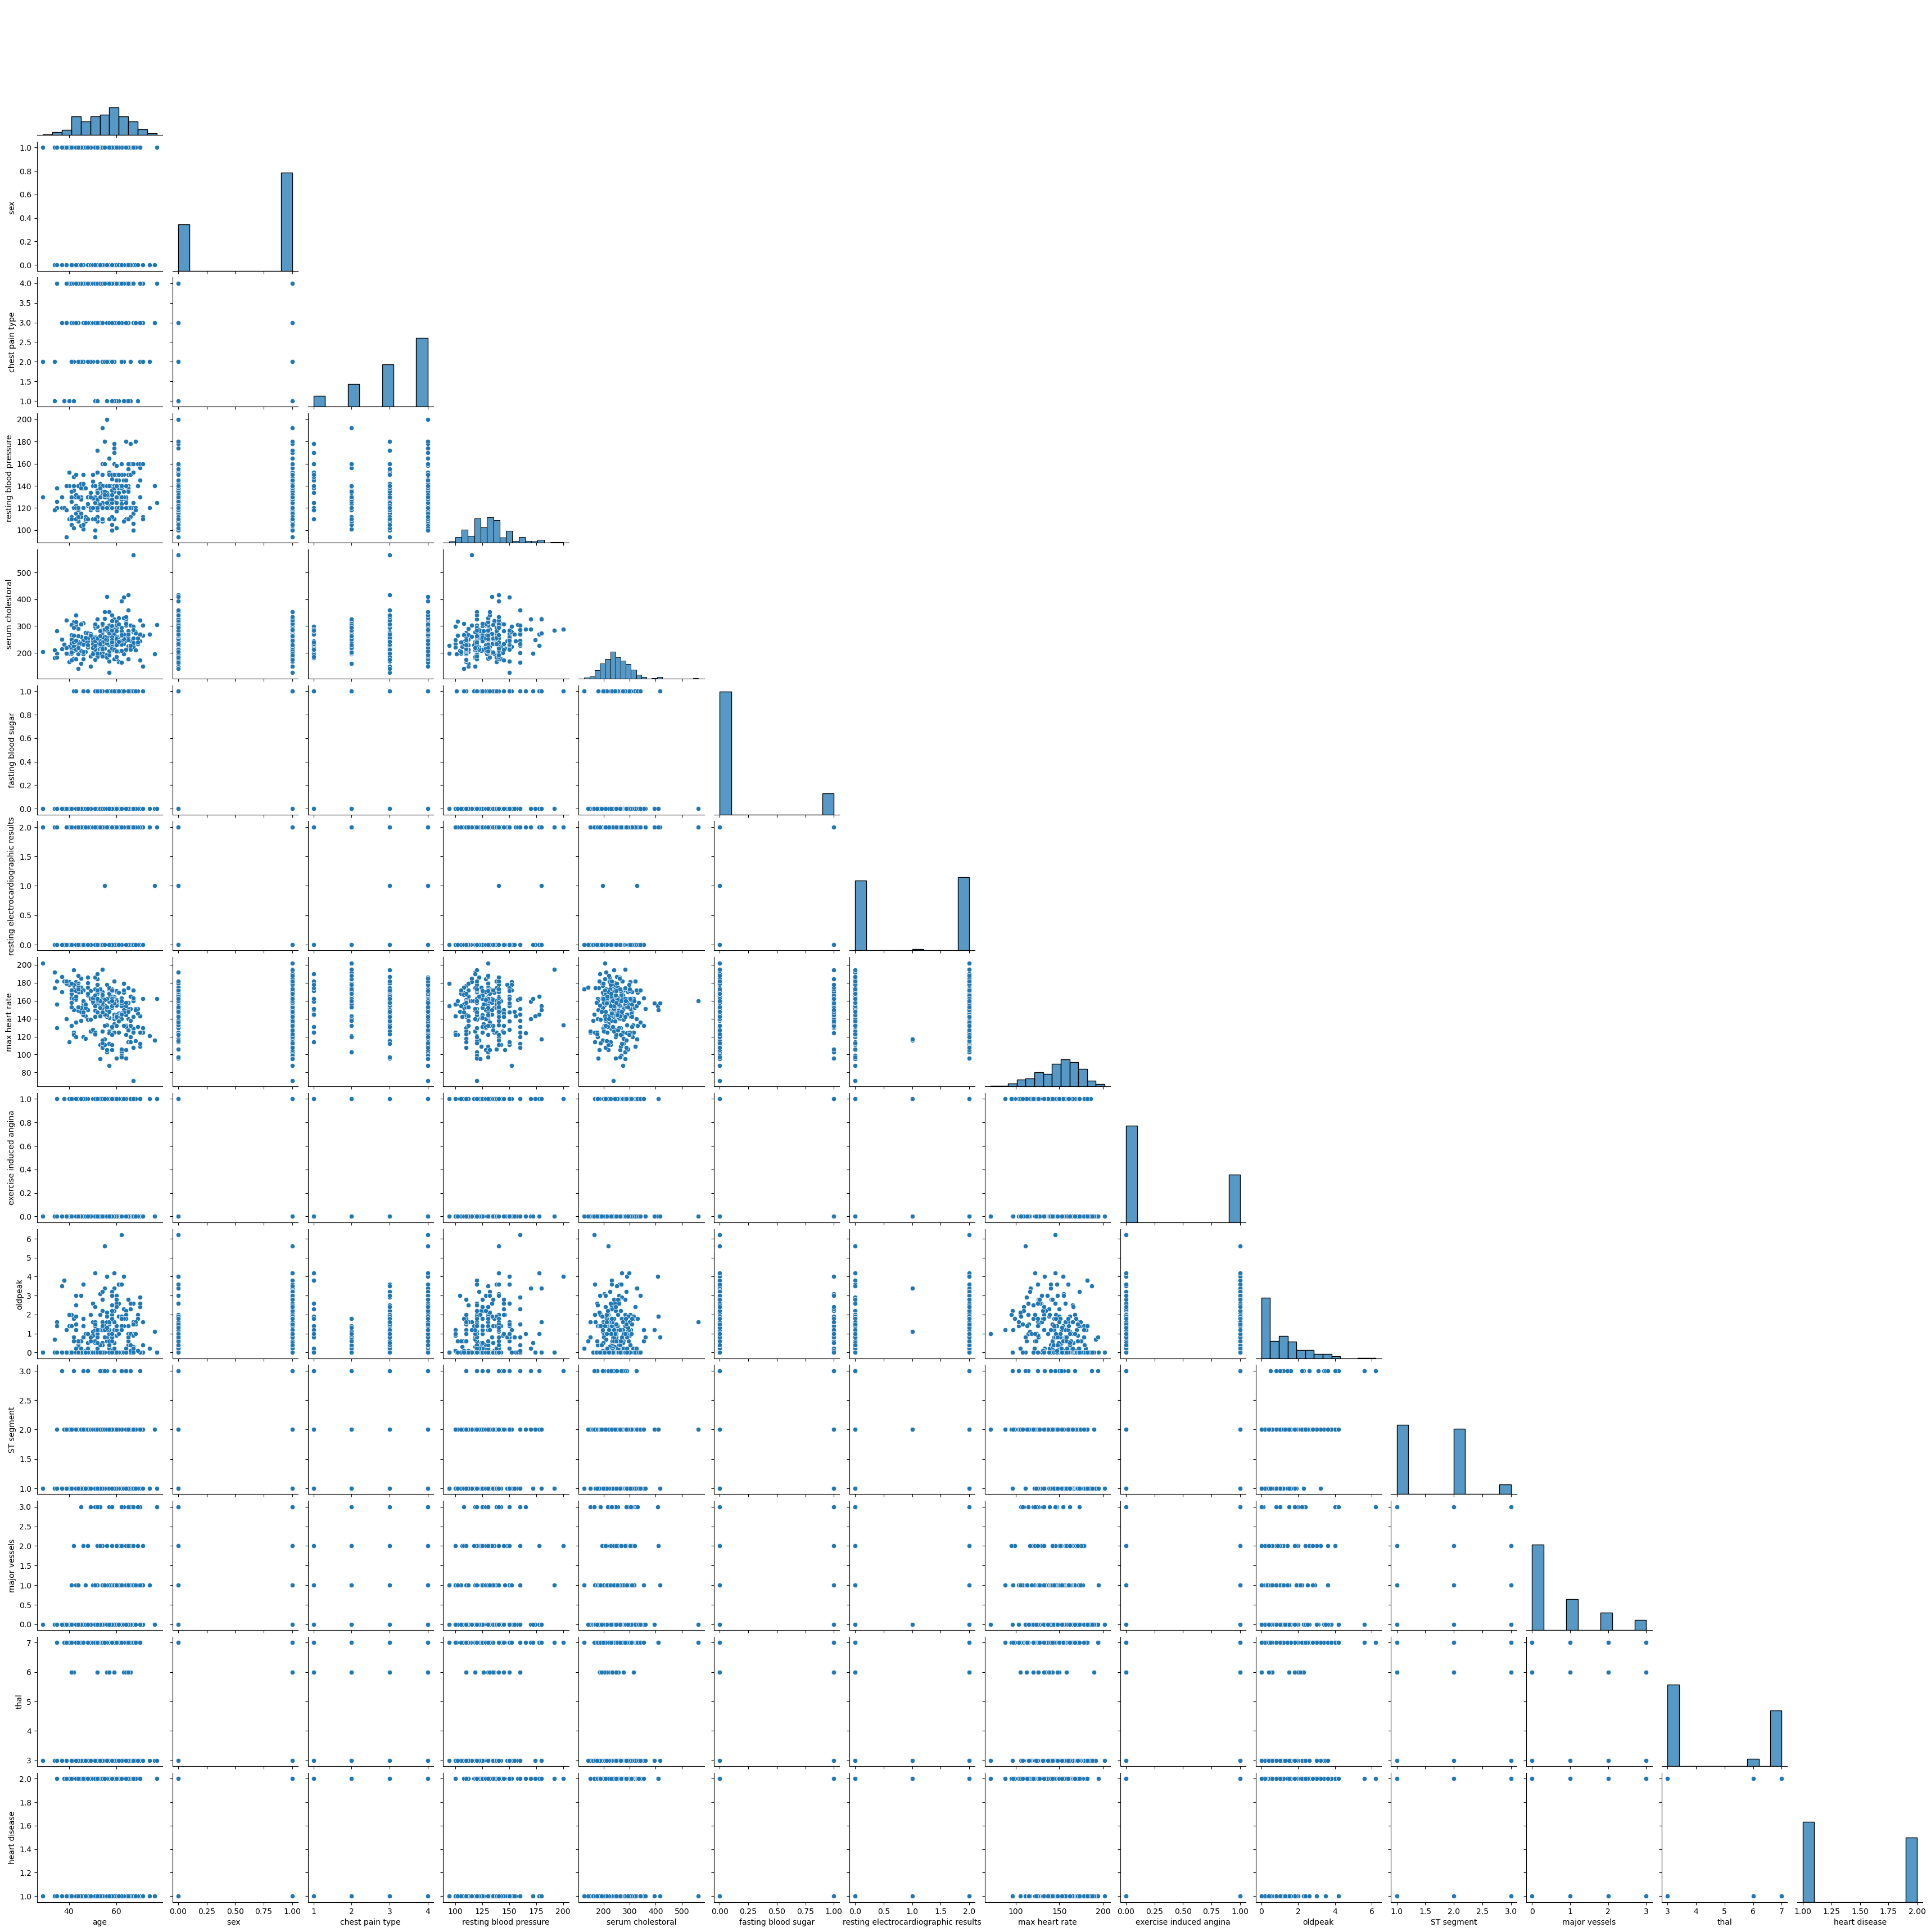

In [26]:
sns.pairplot(df, corner=1)

#### Plotting the correlation matrix

In [27]:
df_corr = df.corr()
df_corr

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
resting blood pressure,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
serum cholestoral,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
fasting blood sugar,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
resting electrocardiographic results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
max heart rate,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
exercise induced angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


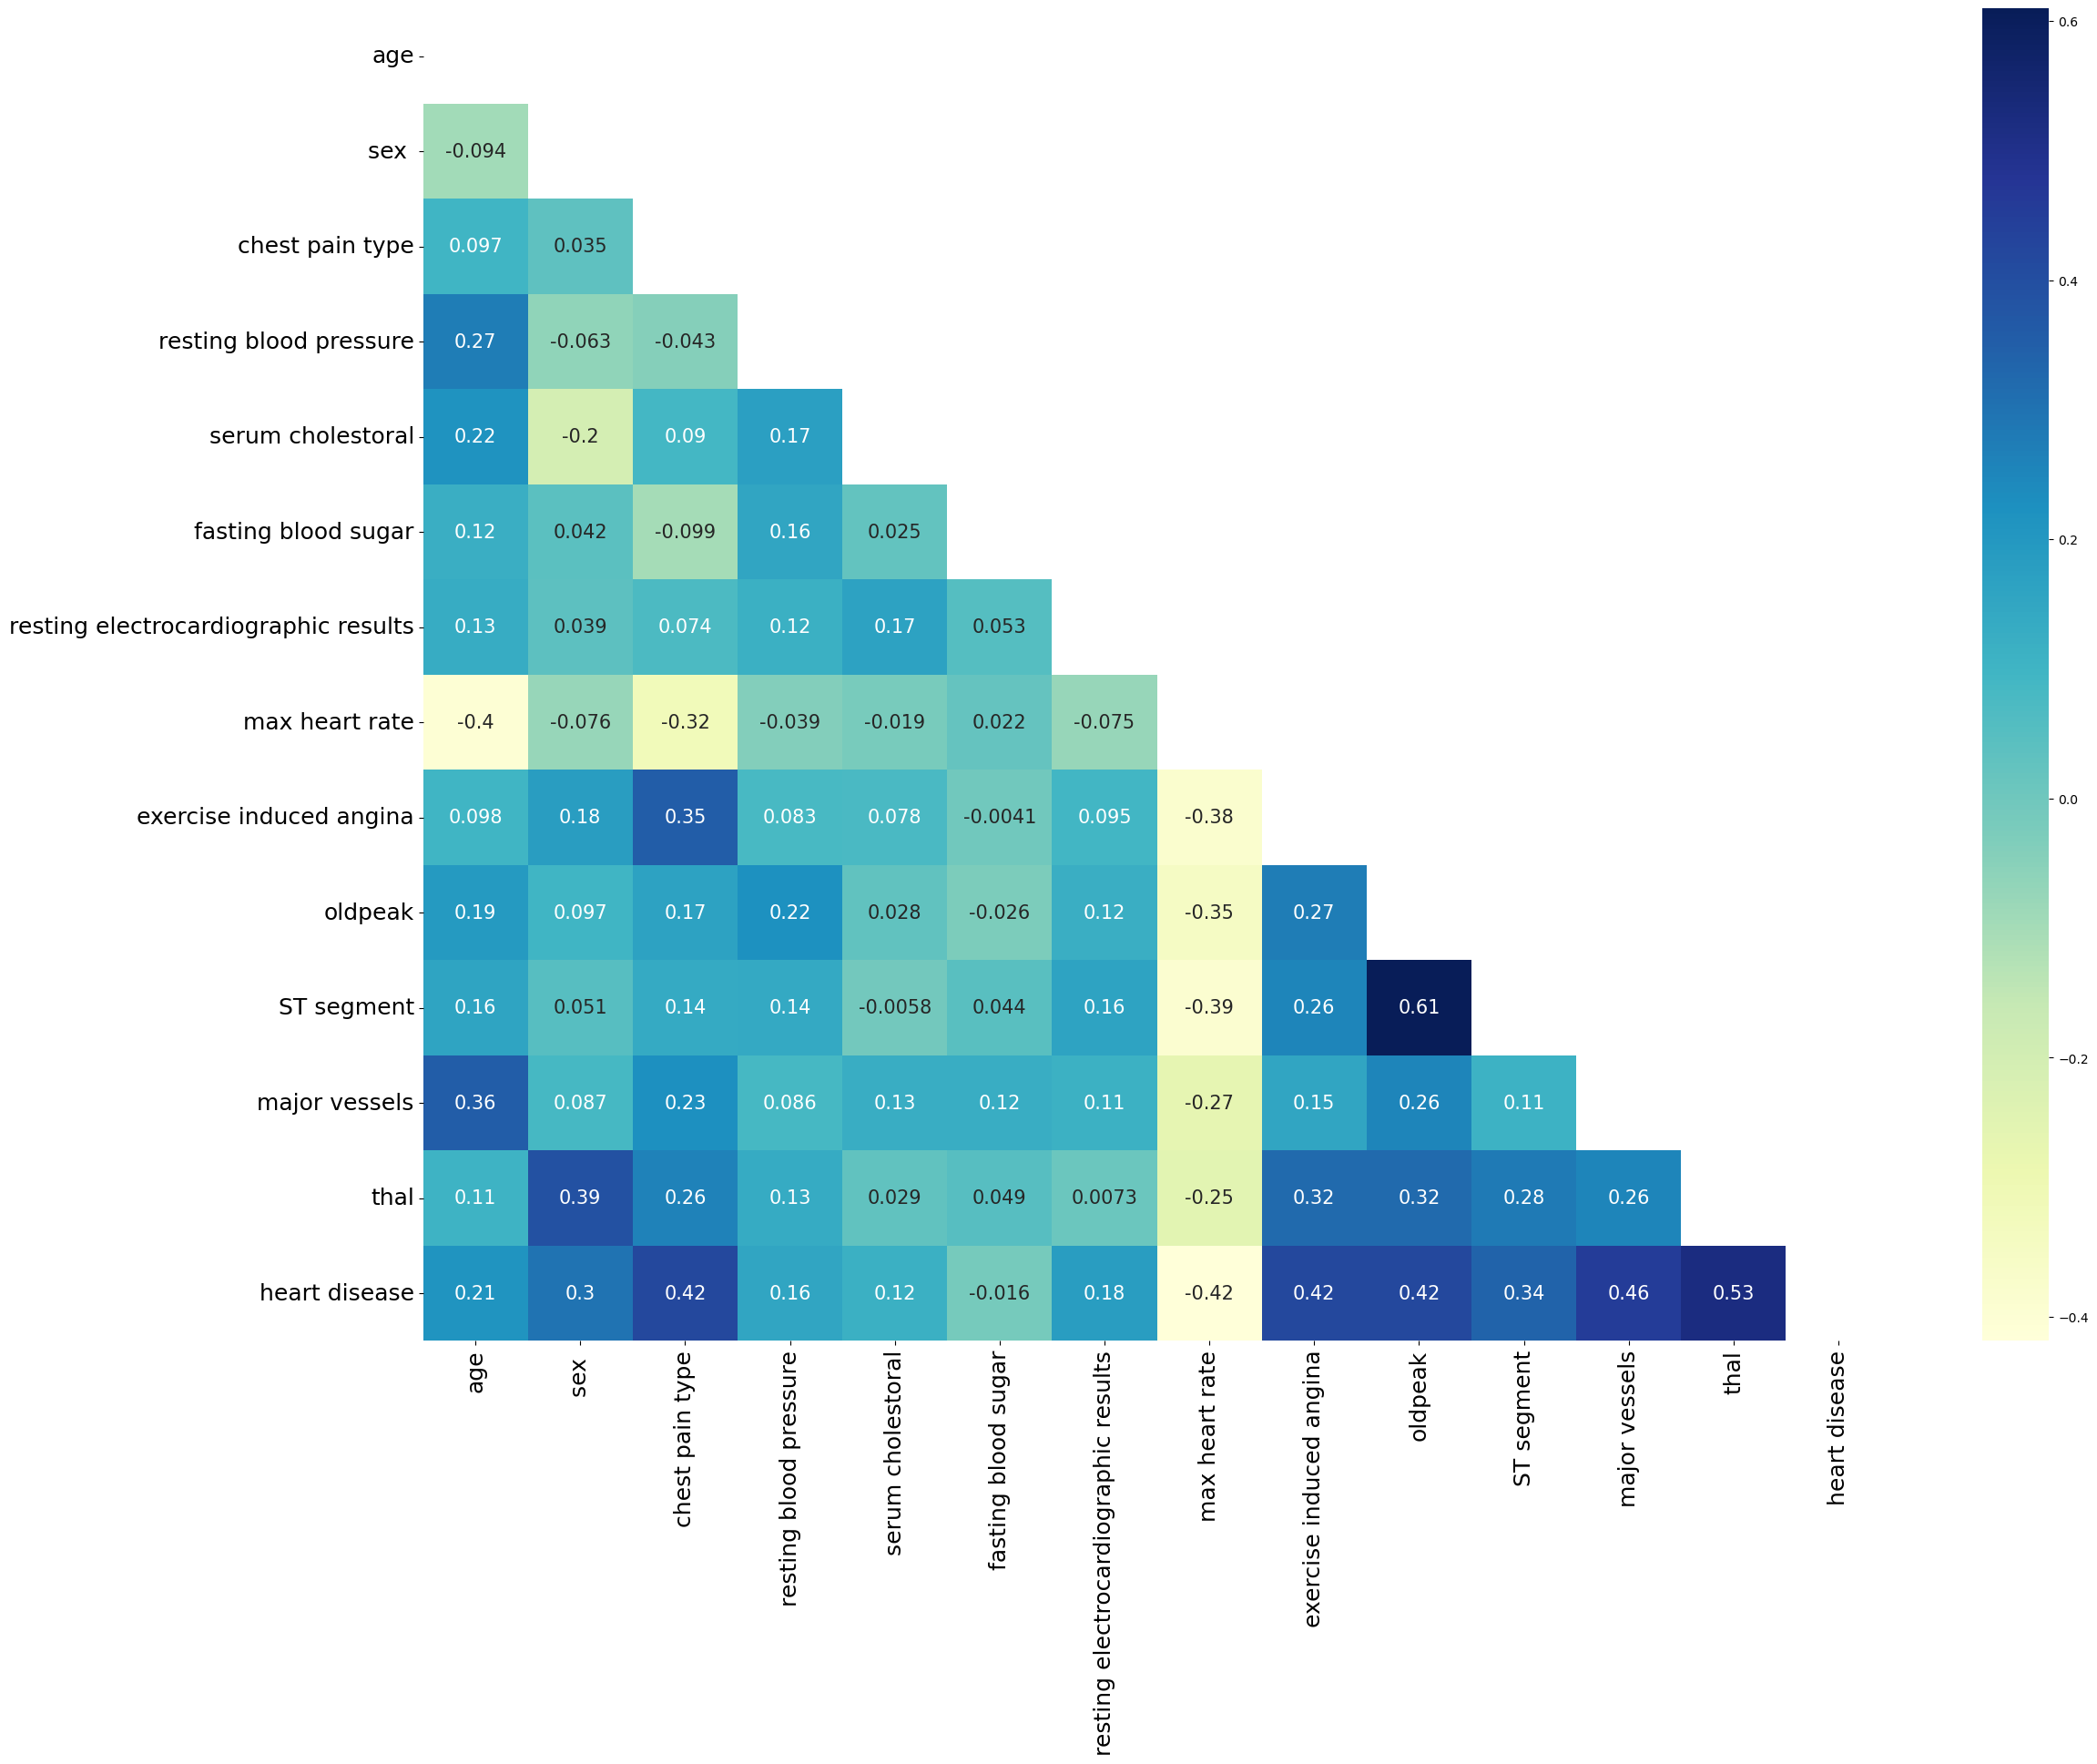

In [35]:
# Heat map
mask= np.triu(np.ones_like(df.corr())) 
plt.figure(figsize=(26, 19))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', mask=mask,annot_kws={'size': 15})
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.show()

In [36]:
# Unstacking the rows and columns to view the correlated variables
df_corr=pd.DataFrame(df_corr.unstack().sort_values()).reset_index()

In [38]:
df_corr.rename(columns={'level_0':'Var1','level_1':'Var2',0:'Corr_Coeff'}, inplace=True)

In [40]:
#Excluding the similar variables and mirror variables
df_corr = df_corr[df_corr['Var1']!=df_corr['Var2']]
df_corr['Correlated Variables']=df_corr.apply(lambda x: '-'.join(sorted([x['Var1'],x['Var2']])),axis=1)
df_corr = df_corr.drop_duplicates(['Correlated Variables'])
df_corr.sort_values(by='Corr_Coeff', ascending=False).reset_index(drop=True).head(20)

,Var1,Var2,Corr_Coeff,Correlated Variables
0,ST segment,oldpeak,0.609712,ST segment-oldpeak
1,heart disease,thal,0.525020,heart disease-thal
2,major vessels,heart disease,0.455336,heart disease-major vessels
3,exercise induced angina,heart disease,0.419303,exercise induced angina-heart disease
4,oldpeak,heart disease,0.417967,heart disease-oldpeak
5,heart disease,chest pain type,0.417436,chest pain type-heart disease
6,sex,thal,0.391046,sex -thal
7,major vessels,age,0.356081,age-major vessels
8,exercise induced angina,chest pain type,0.353160,chest pain type-exercise induced angina
9,ST segment,heart disease,0.337616,ST segment-heart disease


In [ ]:
#### Correlation matrix when there is presence of heart disease

In [42]:
df_corr_hd = df[df['heart disease'] ==2].corr()
df_corr_hd

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
age,1.000000,-0.152624,-0.046182,0.219196,0.158381,0.091487,0.106312,-0.147846,-0.020828,0.094910,0.133841,0.370739,-0.179130,NaN
sex,-0.152624,1.000000,-0.134373,-0.334153,-0.313940,-0.138936,-0.011525,-0.090119,0.044947,-0.131649,-0.145763,-0.086840,0.160723,NaN
chest pain type,-0.046182,-0.134373,1.000000,-0.104221,-0.005062,-0.045648,0.070244,-0.226189,0.351593,0.096421,0.048966,0.123983,0.135995,NaN
resting blood pressure,0.219196,-0.334153,-0.104221,1.000000,0.229565,0.169021,0.077284,0.023049,0.063292,0.164225,0.210917,0.016190,0.104652,NaN
serum cholestoral,0.158381,-0.313940,-0.005062,0.229565,1.000000,0.117099,0.095743,0.045282,0.094748,-0.065617,-0.034653,0.099864,-0.054809,NaN
fasting blood sugar,0.091487,-0.138936,-0.045648,0.169021,0.117099,1.000000,0.078216,0.064748,0.079260,-0.017423,0.089929,0.126453,0.024862,NaN
resting electrocardiographic results,0.106312,-0.011525,0.070244,0.077284,0.095743,0.078216,1.000000,0.045061,-0.031945,0.015661,0.014509,0.141371,-0.090181,NaN
max heart rate,-0.147846,-0.090119,-0.226189,0.023049,0.045282,0.064748,0.045061,1.000000,-0.302264,-0.233346,-0.365404,-0.083757,0.021385,NaN
exercise induced angina,-0.020828,0.044947,0.351593,0.063292,0.094748,0.079260,-0.031945,-0.302264,1.000000,0.181648,0.211436,-0.047163,0.152083,NaN
oldpeak,0.094910,-0.131649,0.096421,0.164225,-0.065617,-0.017423,0.015661,-0.233346,0.181648,1.000000,0.607498,0.129185,0.156612,NaN


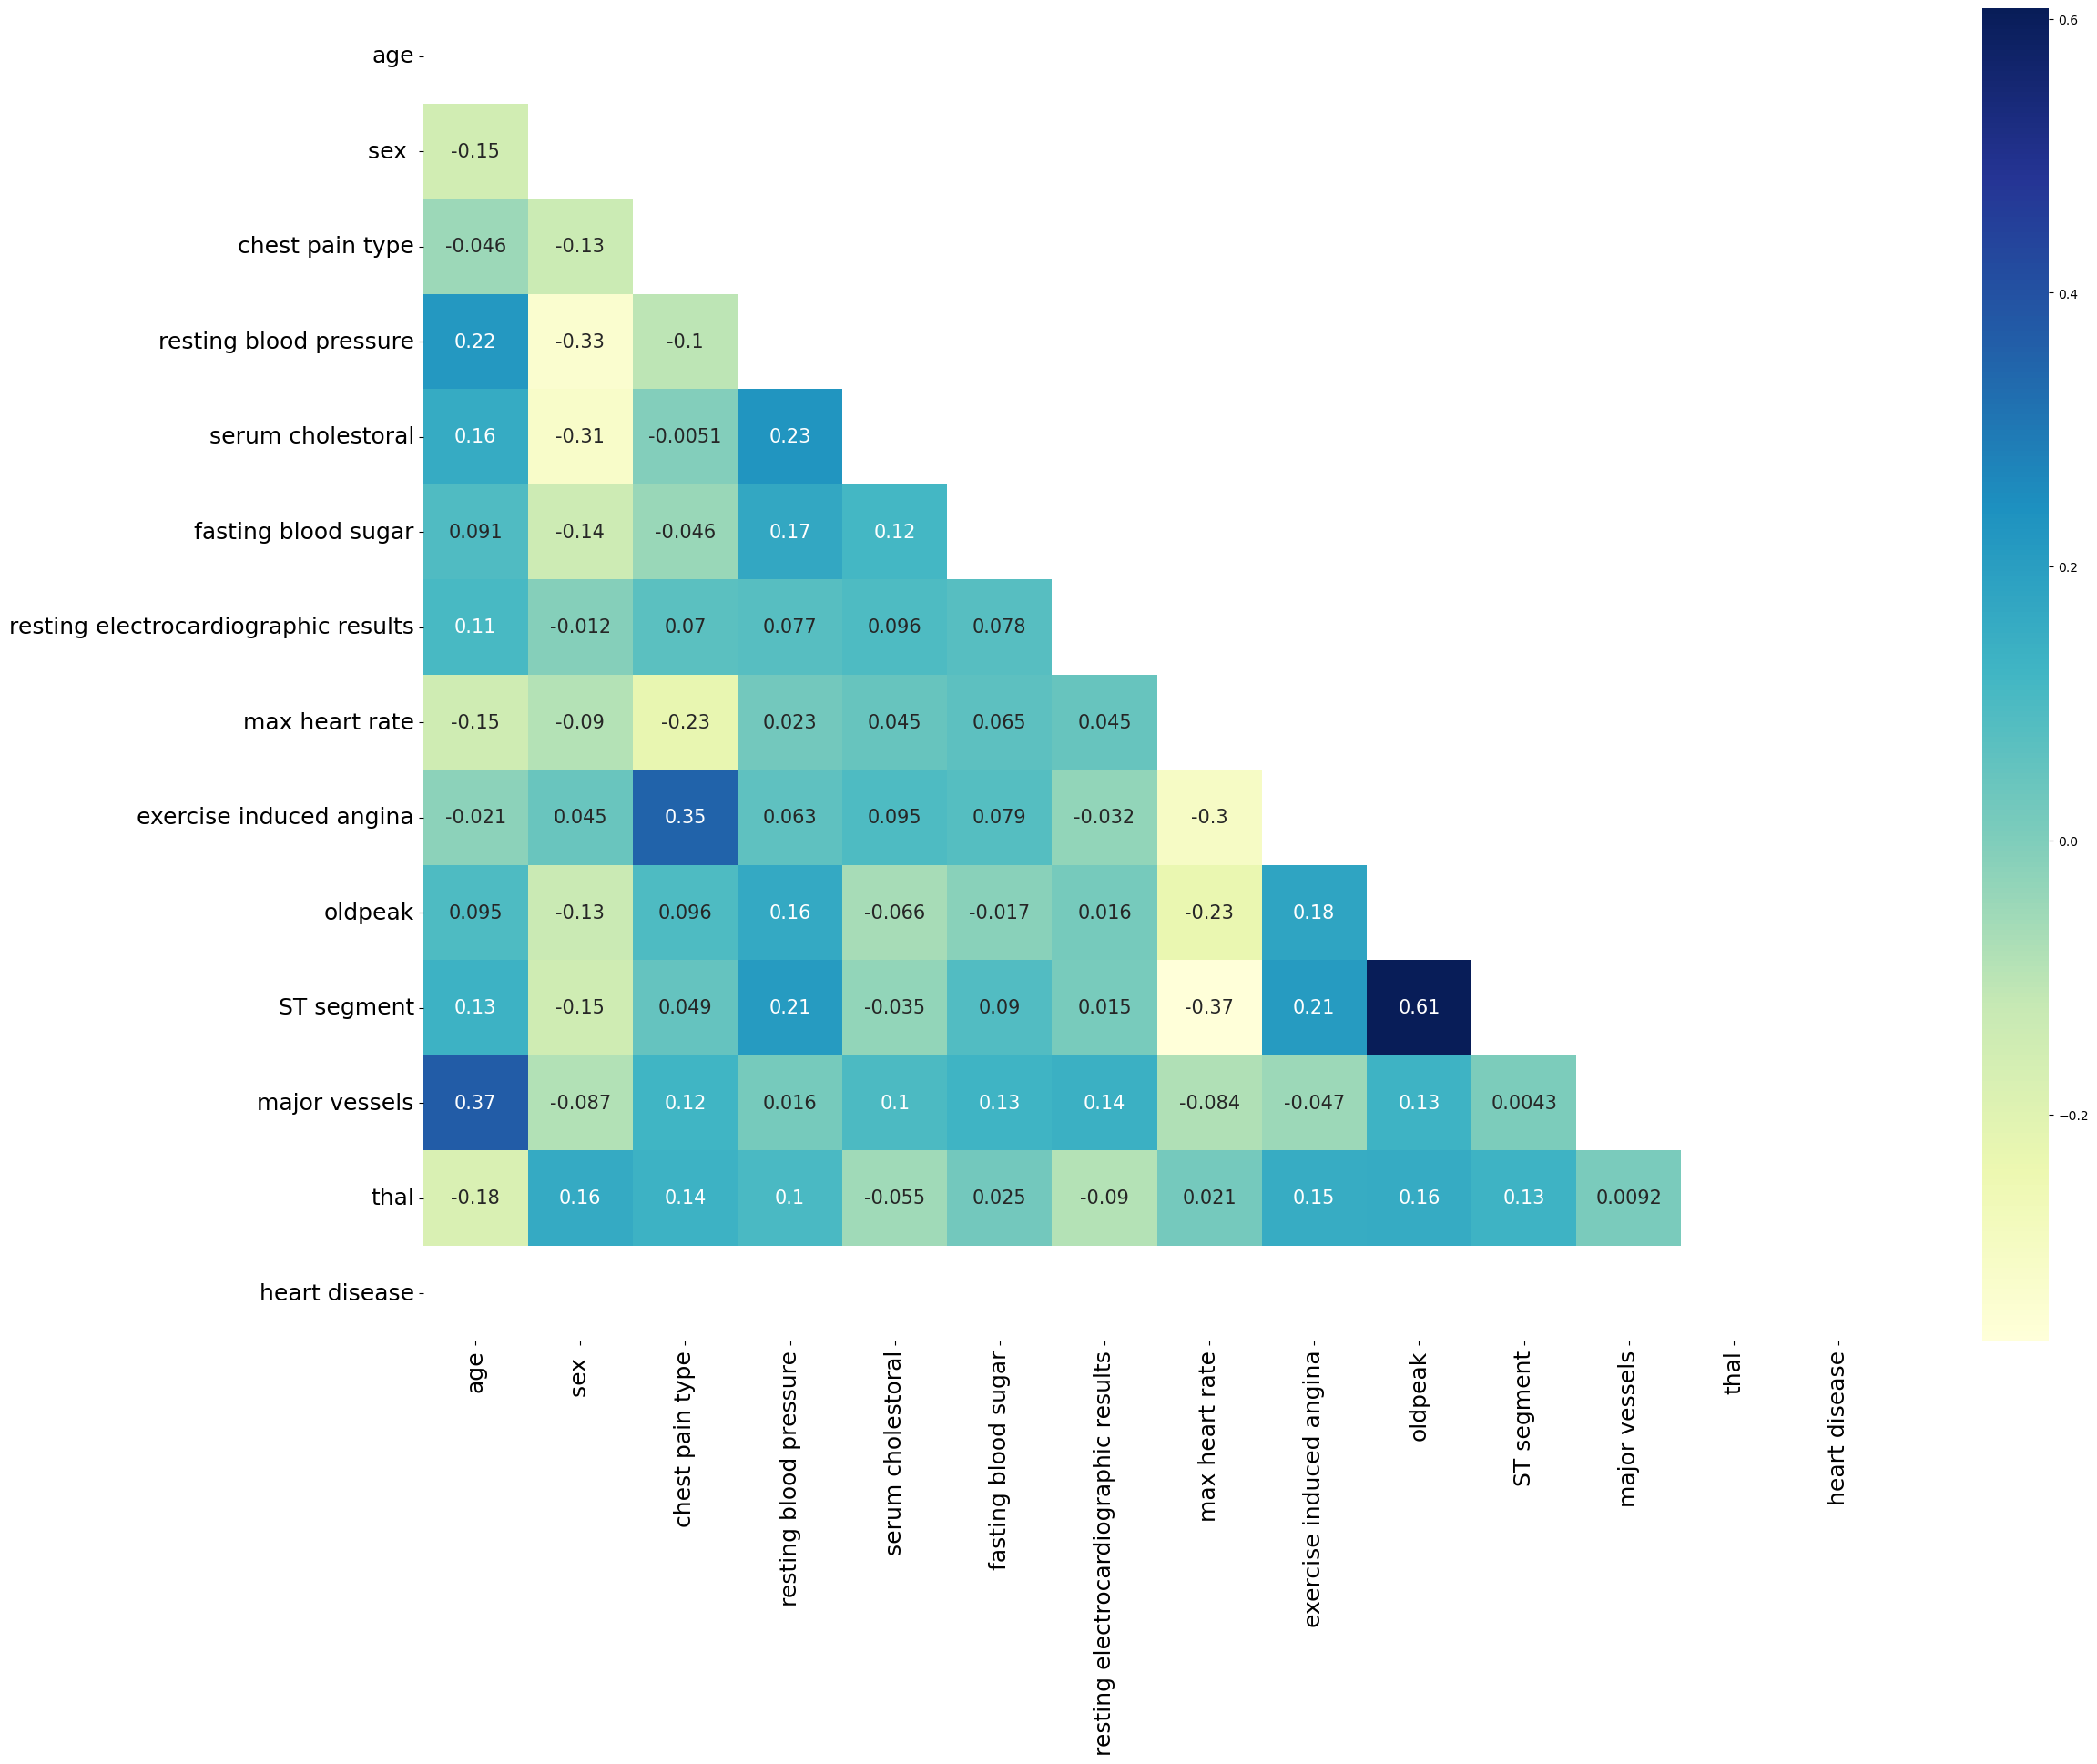

In [44]:
# Heat map
mask= np.triu(np.ones_like(df[df['heart disease'] ==2].corr()))
plt.figure(figsize=(26, 19))
sns.heatmap(df[df['heart disease'] ==2].corr(), annot=True, cmap='YlGnBu', mask=mask,annot_kws={'size': 15})
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.show()

In [45]:
# Unstacking the rows and columns to view the correlated variables
df_corr_hd1=pd.DataFrame(df_corr_hd.unstack().sort_values()).reset_index()

In [46]:
df_corr_hd1.rename(columns={'level_0':'Var1','level_1':'Var2',0:'Corr_Coeff'}, inplace=True)

In [48]:
#Excluding the similar variables and mirror variables
df_corr_hd1 = df_corr_hd1[df_corr_hd1['Var1']!=df_corr_hd1['Var2']]
df_corr_hd1['Correlated Variables']=df_corr_hd1.apply(lambda x: '-'.join(sorted([x['Var1'],x['Var2']])),axis=1)
df_corr_hd1 = df_corr_hd1.drop_duplicates(['Correlated Variables'])
df_corr_hd1.sort_values(by='Corr_Coeff', ascending=False).reset_index(drop=True).head(20)

,Var1,Var2,Corr_Coeff,Correlated Variables
0,oldpeak,ST segment,0.607498,ST segment-oldpeak
1,major vessels,age,0.370739,age-major vessels
2,chest pain type,exercise induced angina,0.351593,chest pain type-exercise induced angina
3,resting blood pressure,serum cholestoral,0.229565,resting blood pressure-serum cholestoral
4,resting blood pressure,age,0.219196,age-resting blood pressure
5,ST segment,exercise induced angina,0.211436,ST segment-exercise induced angina
6,ST segment,resting blood pressure,0.210917,ST segment-resting blood pressure
7,exercise induced angina,oldpeak,0.181648,exercise induced angina-oldpeak
8,resting blood pressure,fasting blood sugar,0.169021,fasting blood sugar-resting blood pressure
9,resting blood pressure,oldpeak,0.164225,oldpeak-resting blood pressure


### Insights
#### For cases with heart diseases there is a positive correlation between old peak and ST segment , also between age and major
#### vessels.
#### The below parameters seems higher in case of patients having heart diseases
#### 1. Age
#### 2. Resting blood pressure
#### 3. Serum cholesterol
#### 4. Old peak
#### 5. Major vessels


### Preparing for modelling

#### Outlier treatment

In [50]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [52]:
df_wo = df.copy()


In [57]:

for column in df_wo.columns:
    lr,ur=remove_outlier(df_wo[column])
    df_wo[column]=np.where(df_wo[column]>ur,ur,df_wo[column])
    df_wo[column]=np.where(df_wo[column]<lr,lr,df_wo[column])

In [58]:
# Checking the boxplot after removing the outliers

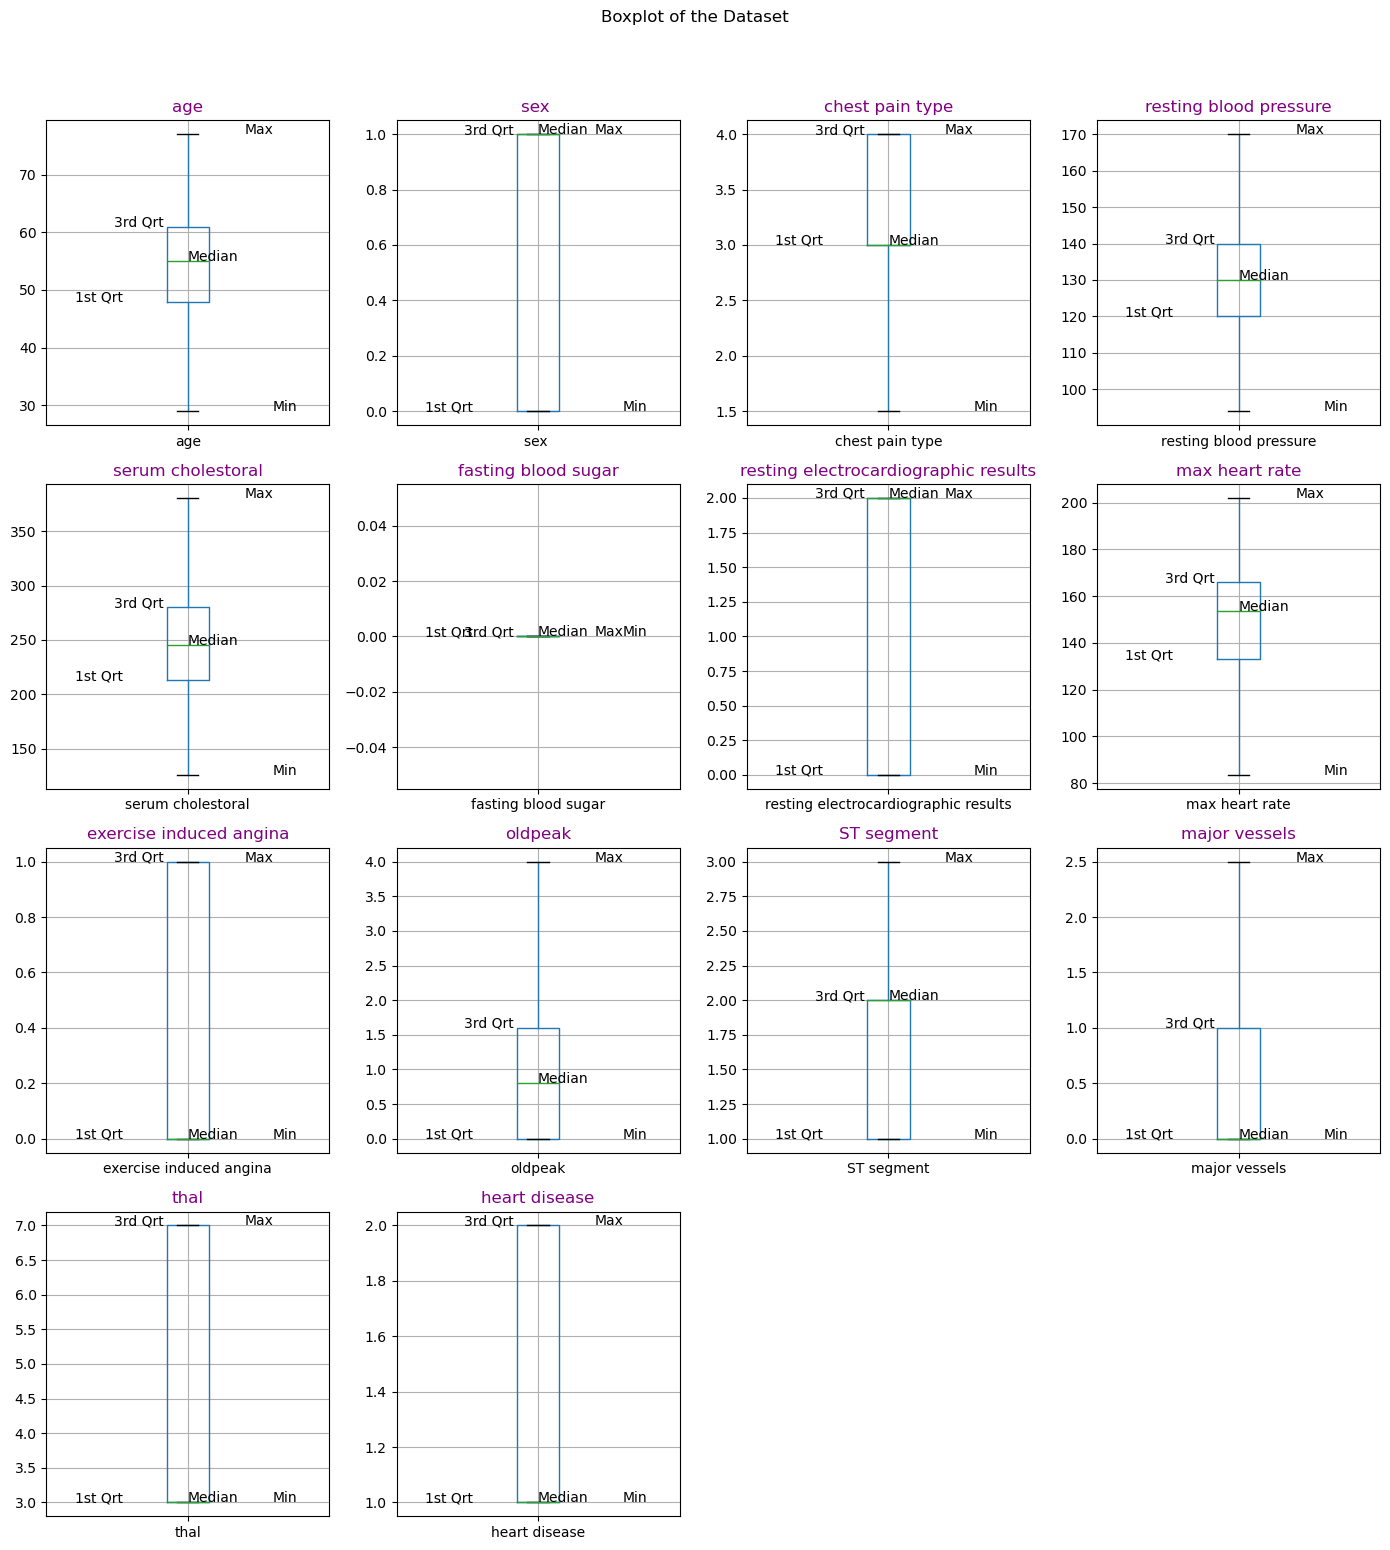

In [60]:
fig=plt.figure(figsize=(14,15))
fig.suptitle('Boxplot of the Dataset', y=1.03)
for i in range(0,df_wo.shape[1]):
    ax=fig.add_subplot(4,4,i+1)
    df_wo.boxplot(column=df_wo.columns[i],return_type='axes',figsize=(8,8))
    plt.text(x=0.74, y=df_wo[df_wo.columns[i]].quantile(q=0.75), s="3rd Qrt")
    plt.text(x=1.0, y=df_wo[df_wo.columns[i]].median(), s="Median")
    plt.text(x=0.6, y=df_wo[df_wo.columns[i]].quantile(q=0.25), s="1st Qrt")
    plt.text(x=1.3, y=df_wo[df_wo.columns[i]].min(), s="Min")
    plt.text(x=1.2, y=df_wo[df_wo.columns[i]].max(), s="Max")
    ax.set_title(df_wo.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [61]:
# df_wo dataset has no Outliers

#### Scaling the dataset

In [62]:
from scipy.stats import zscore
df_wo = df_wo.apply(zscore)
df_wo.head(10)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,1.712094,0.689500,0.907649,-0.057210,1.549364,NaN,0.981664,-1.772364,-0.701222,1.253423,0.676419,2.167718,-0.875706,1.118034
1,1.382140,-1.450327,-0.242892,-0.951808,2.784055,NaN,0.981664,0.447222,-0.701222,0.519115,0.676419,-0.738359,1.189277,-0.894427
2,0.282294,0.689500,-1.393434,-0.415049,0.261908,NaN,-1.026285,-0.379683,-0.701222,-0.674136,-0.954234,-0.738359,1.189277,1.118034
3,1.052186,0.689500,0.907649,-0.176490,0.304119,NaN,-1.026285,-1.946450,1.426081,-0.765924,0.676419,0.424072,1.189277,-0.894427
4,2.152032,-1.450327,-1.393434,-0.653609,0.430754,NaN,0.981664,-1.250109,1.426081,-0.765924,-0.954234,0.424072,-0.875706,-0.894427
5,1.162171,0.689500,0.907649,-0.653609,-1.510982,NaN,-1.026285,-0.423204,-0.701222,-0.582347,-0.954234,-0.738359,1.189277,-0.894427
6,0.172309,0.689500,-0.242892,-0.057210,0.156379,NaN,0.981664,-0.336162,1.426081,-0.398770,0.676419,0.424072,0.673032,1.118034
7,0.502263,0.689500,0.907649,-1.250007,-0.202421,NaN,0.981664,-0.336162,1.426081,0.151961,0.676419,0.424072,1.189277,1.118034
8,0.612248,0.689500,0.907649,0.539188,0.937295,NaN,0.981664,0.882435,-0.701222,0.151961,0.676419,1.586503,1.189277,1.118034
9,0.942201,-1.450327,0.907649,1.135587,2.784055,NaN,0.981664,0.186094,-0.701222,2.722040,0.676419,2.167718,1.189277,1.118034
